In [2]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [5]:
# Initialize Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Drawing utilities for rendering poses
mp_drawing = mp.solutions.drawing_utils


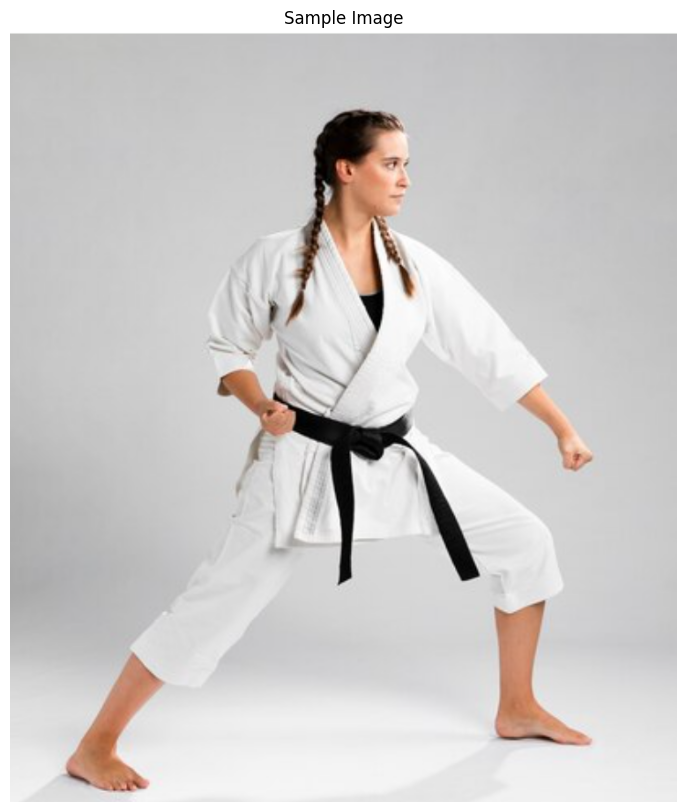

In [9]:
sample_img = cv2.imread('C:\\Users\\mahima joshi\\Pictures\\Screenshots\\Screenshot 2025-04-22 001850.png')

if sample_img is not None:
    sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=[10, 10])
    plt.title("Sample Image")
    plt.axis('off')
    plt.imshow(sample_img_rgb)
    plt.show()
else:
    print("Error: Image not found. Please check the file path.")


In [12]:
#Perform pose detection after converting the image into RGB format. 
# Convert to RGB
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# Initialize Mediapipe Pose module
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Process the image for pose detection
results = pose.process(sample_img_rgb)

# Check if landmarks are found
if results.pose_landmarks:
    # Iterate over the first two landmarks
    for i in range(2):
        # Display the found normalized landmarks
        landmark = results.pose_landmarks.landmark[i]
        print(f'{mp_pose.PoseLandmark(i).name}:\n'
              f'X: {landmark.x}, Y: {landmark.y}, Z: {landmark.z}')
else:
    print("No landmarks found.")

NOSE:
X: 0.5965424180030823, Y: 0.19789695739746094, Z: -0.3848206698894501
LEFT_EYE_INNER:
X: 0.5885500311851501, Y: 0.17705795168876648, Z: -0.36162540316581726


In [13]:
# Retrieve the height and width of the sample image
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found
if results.pose_landmarks:
    # Iterate over the first two landmarks
    for i in range(2):
        # Get the landmark at index i
        landmark = results.pose_landmarks.landmark[i]
        
        # Convert normalized landmarks to original scale
        x = landmark.x * image_width
        y = landmark.y * image_height
        z = landmark.z * image_width  # Usually 'z' might be scaled differently, but this will work for now
        visibility = landmark.visibility

        # Display the found landmarks after converting them into their original scale
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {x}')
        print(f'y: {y}')
        print(f'z: {z}')
        print(f'visibility: {visibility}\n')
else:
    print("No landmarks found.")

NOSE:
x: 435.47596514225006
y: 166.82713508605957
z: -280.91908901929855
visibility: 0.9999964237213135

LEFT_EYE_INNER:
x: 429.6415227651596
y: 149.25985327363014
z: -263.9865443110466
visibility: 0.9999865293502808



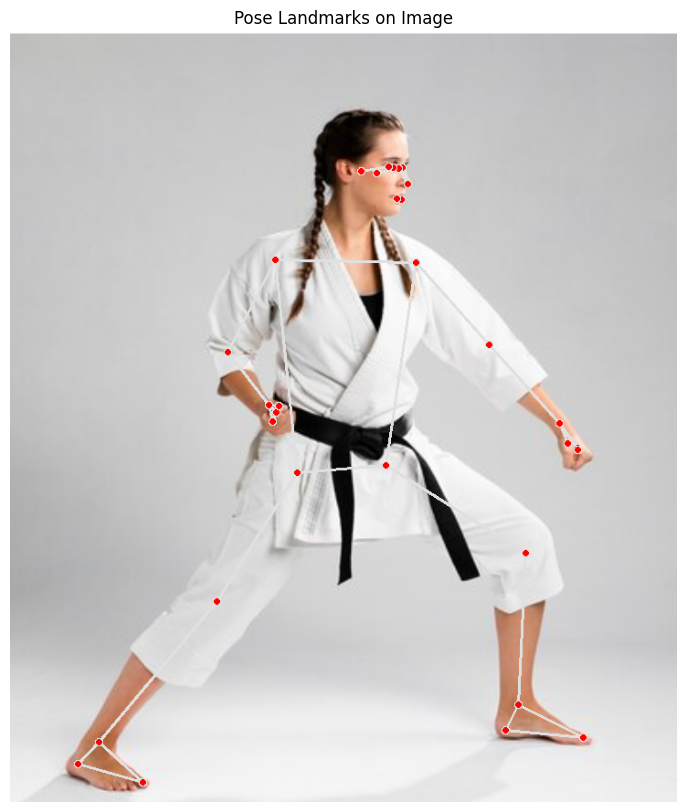

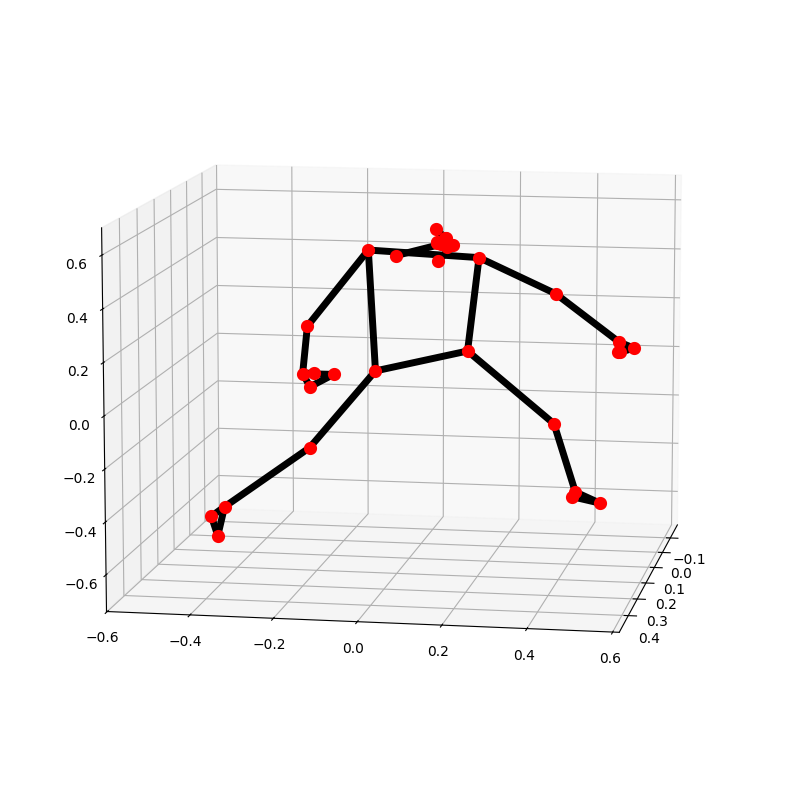

In [19]:
# Create a copy of the sample image to draw landmarks on
img_copy = sample_img.copy()

# Check if any landmarks are found
if results.pose_landmarks:
    # Draw pose landmarks on the image
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

    # Specify a size for the figure and display the output image with the landmarks drawn
    plt.figure(figsize=[10, 10])
    plt.title("Pose Landmarks on Image")
    plt.axis('off')
    plt.imshow(img_copy[:,:,::-1])  # Convert from BGR to RGB for display
    plt.show()

    # Now, visualize the 3D pose landmarks using `POSE_WORLD_LANDMARKS`
    if results.pose_world_landmarks:
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
else:
    print("No landmarks found.")